## Time series analysis

In [40]:
# import libraraies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# load data of international air passengers from github

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'

data = pd.read_csv(url)

# check the data

data.tail()





,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [42]:
# check the shape of the data

data.shape

(144, 2)

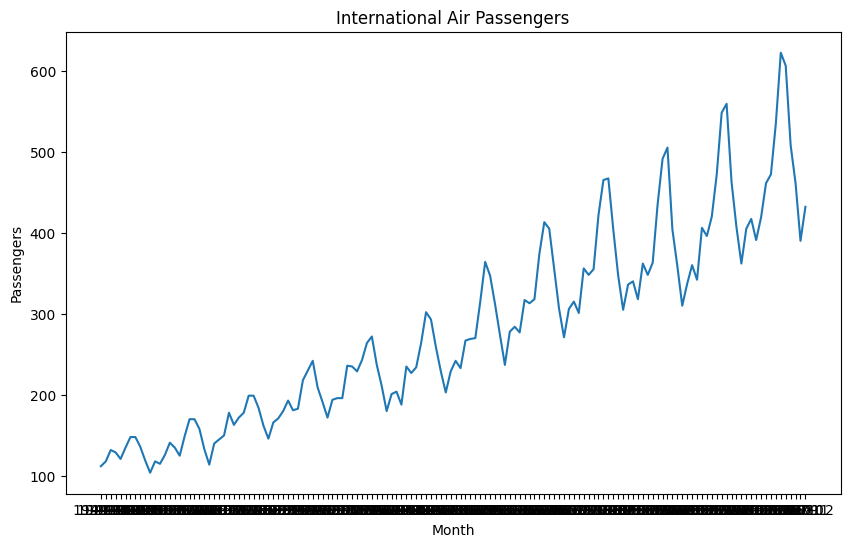

In [43]:
# plot the data to check trends and seasonality

plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Passengers'])
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('International Air Passengers')
plt.show()



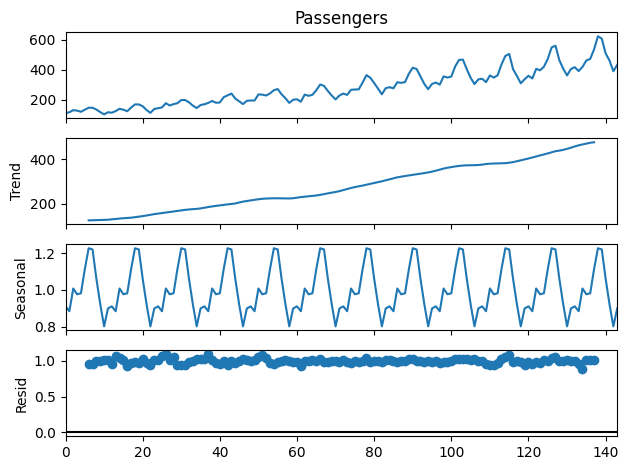

In [44]:
# decompose the data to check trend, seasonality and residuals

result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

result.plot()

plt.show()






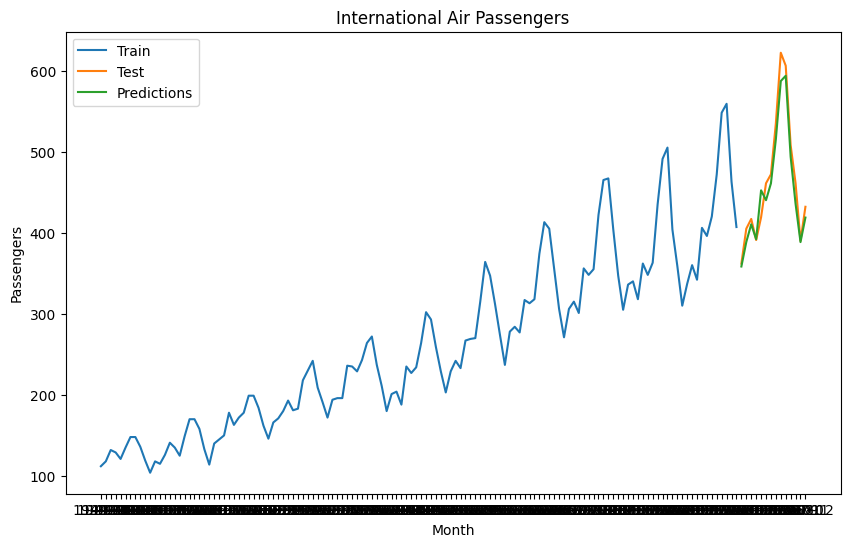

In [45]:
# checking time series data prediction

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# split the data into train and test

train = data.iloc[:130]

test = data.iloc[130:]

# fit the model

model = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='add', seasonal_periods=12)

model_fit = model.fit()

# predict the values

pred = model_fit.forecast(steps=16)

# plot the data

plt.figure(figsize=(10, 6))

plt.plot(train['Month'], train['Passengers'], label='Train')
plt.plot(test['Month'], test['Passengers'], label='Test')
plt.plot(test['Month'][:14], pred[:14], label='Predictions')  # Update the dimensions for plotting
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('International Air Passengers')
plt.legend()
plt.show()


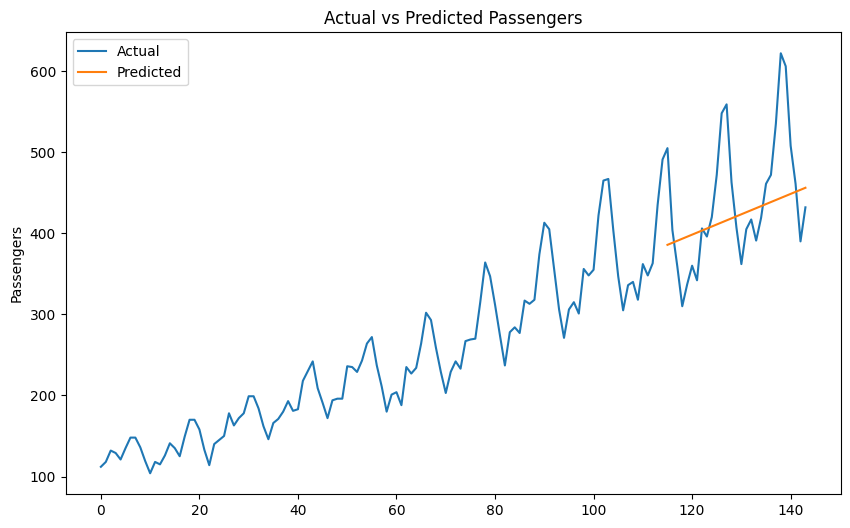

In [50]:


# Split data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Perform linear regression using sklearn

from sklearn.linear_model import LinearRegression

# Create linear regression object

model = LinearRegression()

# Train the model using the training sets

model.fit(np.array(train_data.index).reshape(-1, 1), train_data['Passengers'])

# Make predictions using the testing set

predictions = model.predict(np.array(test_data.index).reshape(-1, 1))

# Visualize actual vs predicted values

plt.figure(figsize=(10, 6))

plt.plot(data.index, data['Passengers'], label='Actual')

plt.plot(test_data.index, predictions, label='Predicted')

plt.ylabel('Passengers')

plt.title('Actual vs Predicted Passengers')

plt.legend()

plt.show()